In [2]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

C:\Users\Deevita\AppData\Local\Temp\ipykernel_12628\2215575909.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [3]:
df = pd.read_csv('00 df.csv')
train = df[df['flag']=='train']
test = df[df['flag']=='test']

In [4]:
cat_feats = ['age_bin','capital_gl_bin','education_bin','hours_per_week_bin','msr_bin','occupation_bin','race_sex_bin']

y_train = train['y']
x_train = train[['age_bin','capital_gl_bin','education_bin','hours_per_week_bin','msr_bin','occupation_bin','race_sex_bin']]
x_train = pd.get_dummies(x_train,columns=cat_feats,drop_first=True)

y_test = test['y']
x_test = test[['age_bin','capital_gl_bin','education_bin','hours_per_week_bin','msr_bin','occupation_bin','race_sex_bin']]
x_test = pd.get_dummies(x_test,columns=cat_feats,drop_first=True)

<Axes: >

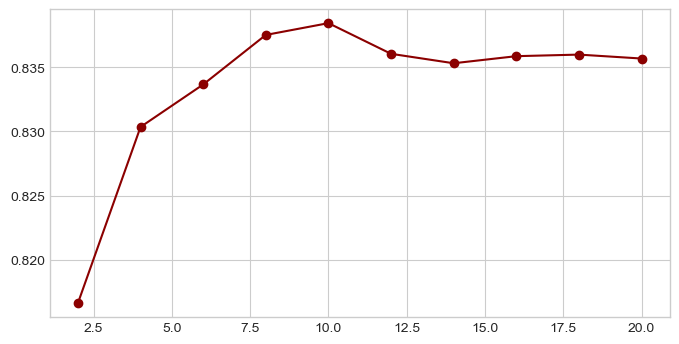

In [5]:
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth=trees, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)
    
plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color="darkred",marker="o")

<Axes: >

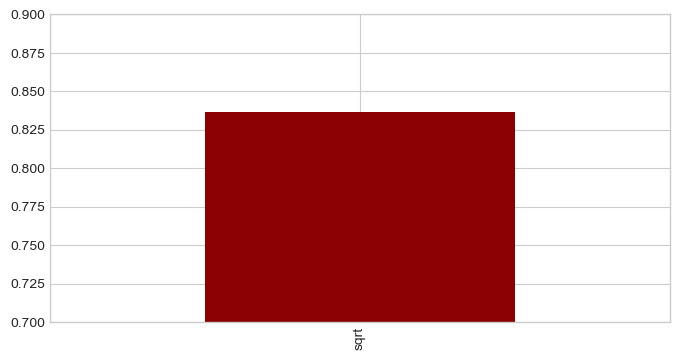

In [9]:
results = []
model = DecisionTreeClassifier(max_depth=20, random_state=101, max_features='sqrt')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = np.mean(y_test==y_pred)
results.append(accuracy)
    
plt.figure(figsize=(8,4))
pd.Series(results, ['sqrt']).plot(kind="bar",color="darkred",ylim=(0.7,0.9))

<Axes: >

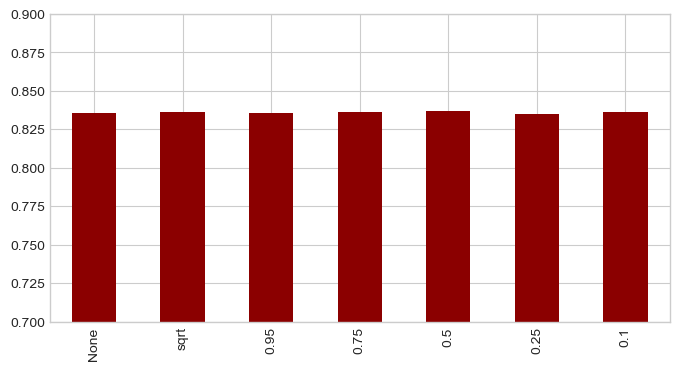

In [10]:
results = []
max_depth_options = [None, 'sqrt',0.95,0.75,0.5,0.25,0.10]
for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth=20, random_state=101, max_features=trees)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)
    
plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(kind="bar",color="darkred",ylim=(0.7,0.9))

In [13]:
results = []
model = DecisionTreeClassifier(max_depth=20, random_state=101, max_features=None, min_samples_leaf=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = np.mean(y_test==y_pred)
results.append(accuracy)

In [14]:
results

[0.8387691173760825]

<Axes: >

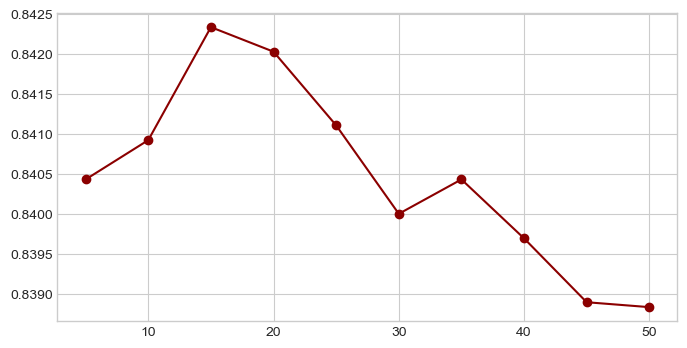

In [15]:
results = []
min_samples_leaf_options = [5,10,15,20,25,30,35,40,45,50]
for trees in min_samples_leaf_options:
    model = DecisionTreeClassifier(max_depth=10, random_state=101, max_features=None, min_samples_leaf=trees)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)
    
plt.figure(figsize=(8,4))
pd.Series(results, min_samples_leaf_options).plot(color="darkred",marker="o")

In [17]:
dtree = DecisionTreeClassifier(max_depth=20, random_state=101, max_features=None, min_samples_leaf=15)
dtree.fit(x_train, y_train)
y_pred=dtree.predict(x_test)

In [20]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
df_table = confusion_matrix(y_test,y_pred)
print(df_table)
print("Precision:", precision)
print("Recall:", recall)
print('Accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print('f1 score: ', (2*precision*recall)/(precision+recall))

[[11523   912]
 [ 1688  2158]]
Precision: 0.8322355034620907
Recall: 0.8403046495915484
Accuracy: 0.8403046495915484
f1 score:  0.8362506117865741
